In [ ]:
import tensorflow as tf
import os
gpus =  tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
cards_df = pd.read_csv("/content/drive/MyDrive/UCI_Credit_Card.csv (1).zip")
cards_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
rows, col = cards_df.shape
print(f'ROWS -> {rows} and Columns -> {col}')

ROWS -> 30000 and Columns -> 25


In [ ]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
cards_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#Renaming the column convention to avoid any confusion
cards_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
missing_values_count = cards_df.isna().sum()
missing_values_count

table = PrettyTable()
table.field_names = ["Column", "Missing Values Count"]

for column, count in missing_values_count.items():
    table.add_row([column, count])

# Set table properties
table.align["Column"] = "l"
table.align["Missing Values Count"] = "r"

# Print the table
print(table)

+----------------------------+----------------------+
| Column                     | Missing Values Count |
+----------------------------+----------------------+
| ID                         |                    0 |
| LIMIT_BAL                  |                    0 |
| SEX                        |                    0 |
| EDUCATION                  |                    0 |
| MARRIAGE                   |                    0 |
| AGE                        |                    0 |
| PAY_1                      |                    0 |
| PAY_2                      |                    0 |
| PAY_3                      |                    0 |
| PAY_4                      |                    0 |
| PAY_5                      |                    0 |
| PAY_6                      |                    0 |
| BILL_AMT1                  |                    0 |
| BILL_AMT2                  |                    0 |
| BILL_AMT3                  |                    0 |
| BILL_AMT4                 

In [ ]:
cards_df.rename(columns = {'default.payment.next.month':'default_pay'}, inplace=True)
cards_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


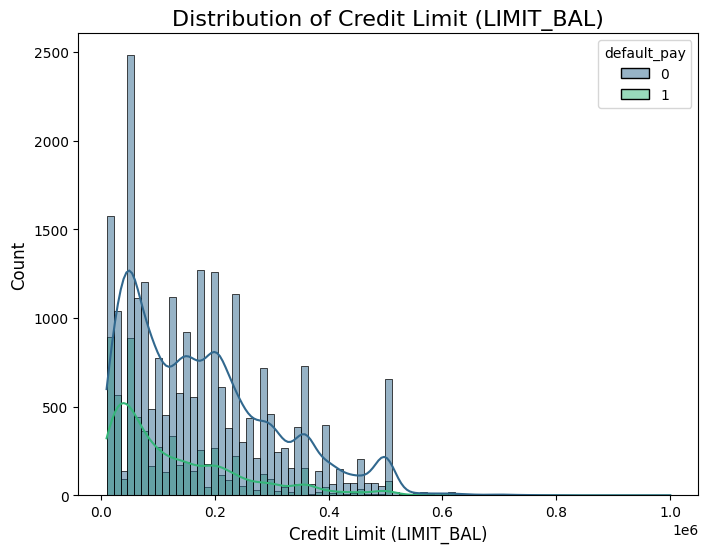

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cards_df, x='LIMIT_BAL', hue=cards_df.default_pay, kde=True, palette='viridis')
plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=16)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


+-------------+-------+
| Default Pay | Count |
+-------------+-------+
|      0      | 23364 |
|      1      |  6636 |
+-------------+-------+


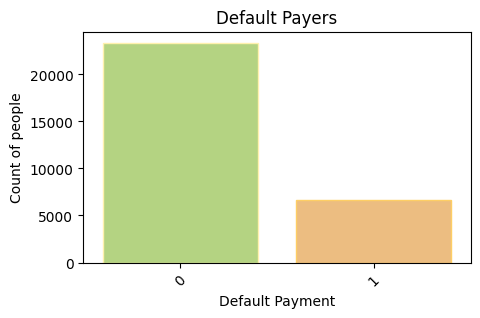

In [ ]:
default_pay = cards_df['default_pay'].value_counts()

table = PrettyTable()
table.field_names = ["Default Pay", "Count"]

# Add rows to the table
for value, count in default_pay.items():
    table.add_row([value, count])

# Print the table
print(table)


plt.figure(figsize=(5,3))
sns.barplot(x=default_pay.index, y=default_pay.values, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Count of people')
plt.show()

In [ ]:
defaulters = cards_df.copy()
defaulters.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


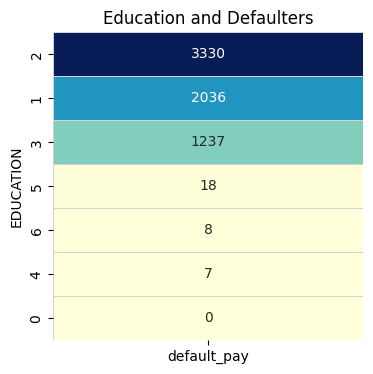

In [ ]:
#Is there a connection between education and defaulters?

education = defaulters[['EDUCATION', 'default_pay']].groupby(['EDUCATION'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Education and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()


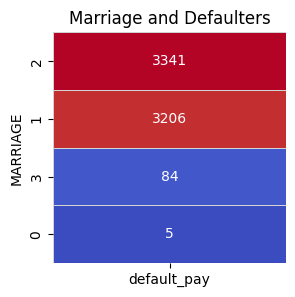

In [ ]:
#Is there a connection between marriage and defaulters?

education = defaulters[['MARRIAGE', 'default_pay']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(3,3))
plt.title('Marriage and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()


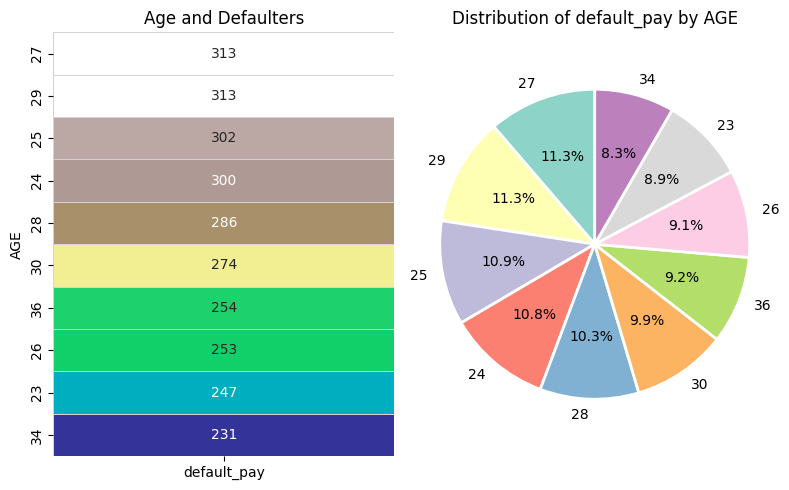

In [ ]:
# Is there a connection between people's age and defaulters?
education = defaulters[['AGE', 'default_pay']].groupby(['AGE'], axis=0).sum().sort_values('default_pay', ascending=False)[:10]

palette = "Set3"

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot heatmap on the left subplot
axes[0].set_title('Age and Defaulters')
sns.heatmap(education, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

# Plot pie chart on the right subplot
axes[1].set_title("Distribution of default_pay by AGE")
axes[1].pie(education["default_pay"], labels=education.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal")  # Ensure the pie is drawn as a circle

plt.tight_layout()
plt.show()


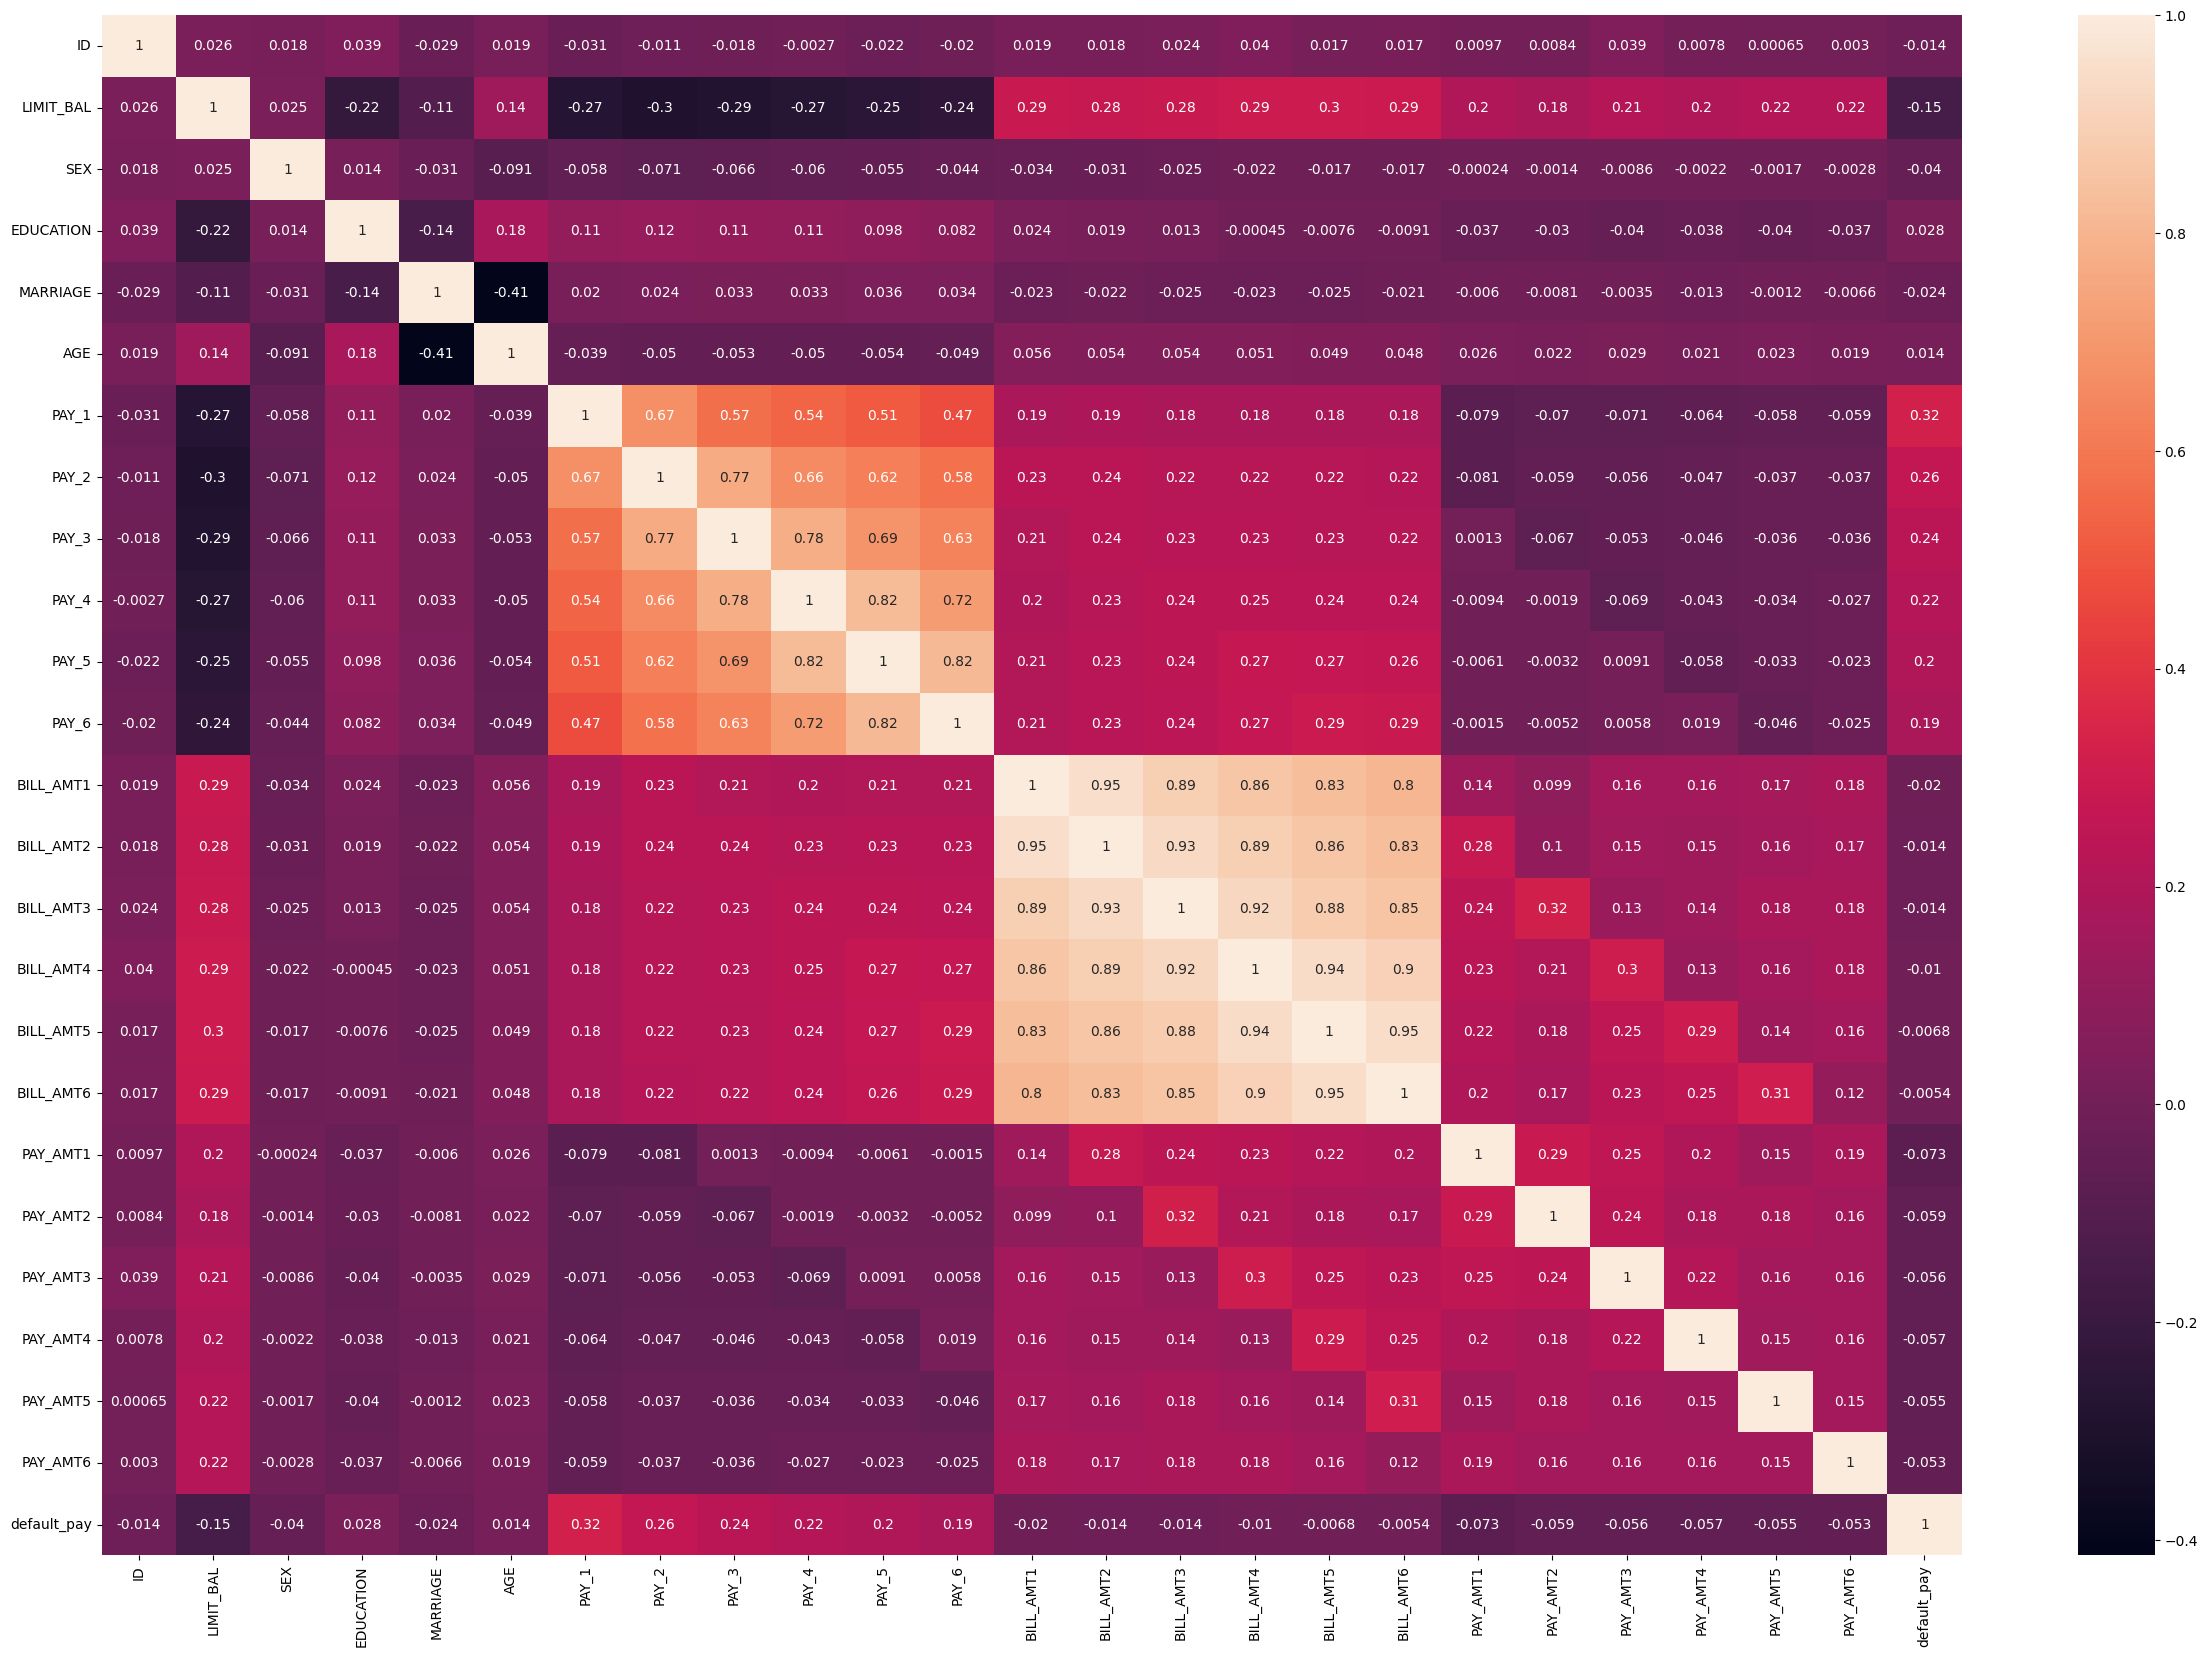

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()


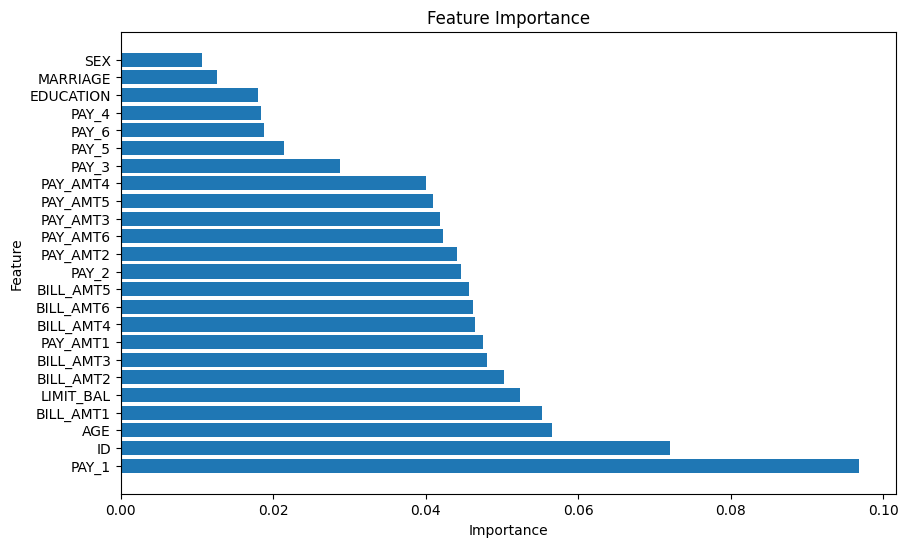

      Feature  Importance
6       PAY_1    0.096831
0          ID    0.072076
5         AGE    0.056621
12  BILL_AMT1    0.055276
1   LIMIT_BAL    0.052423
13  BILL_AMT2    0.050231
14  BILL_AMT3    0.048010
18   PAY_AMT1    0.047576
15  BILL_AMT4    0.046531
17  BILL_AMT6    0.046187
16  BILL_AMT5    0.045667
7       PAY_2    0.044656
19   PAY_AMT2    0.044102
23   PAY_AMT6    0.042242
20   PAY_AMT3    0.041870
22   PAY_AMT5    0.040983
21   PAY_AMT4    0.040081
8       PAY_3    0.028814
10      PAY_5    0.021380
11      PAY_6    0.018836
9       PAY_4    0.018345
3   EDUCATION    0.018066
4    MARRIAGE    0.012559
2         SEX    0.010638


In [ ]:
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)


In [ ]:
def_new = defaulters[["PAY_1", "AGE", "BILL_AMT1", "BILL_AMT2","BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "LIMIT_BAL", "PAY_2", "BILL_AMT2","BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default_pay"]]

# Splitting the data into features and target
X = def_new.drop('default_pay', axis=1)
y = def_new['default_pay']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)


# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.7811666666666667
Decision Tree Accuracy: 0.7248333333333333
Random Forest Accuracy: 0.8085


In [ ]:
# since we know that our data is imbalanced, let's apply SMOTE to balance the dataset and see if it improves our accuracy.
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb_classifier = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)


# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb_classifier.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6052856837149583
Decision Tree Accuracy: 0.7515514658677509
Random Forest Accuracy: 0.8429274555959769
XGBoost Accuracy: 0.8311577145302803


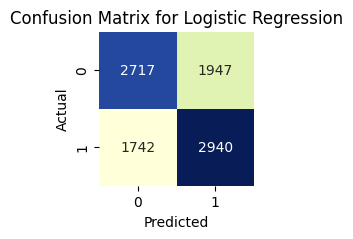

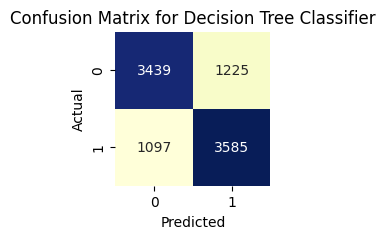

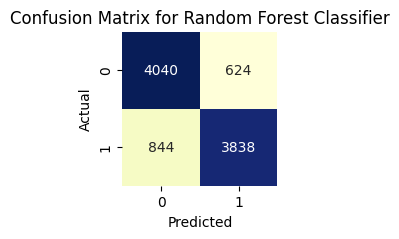

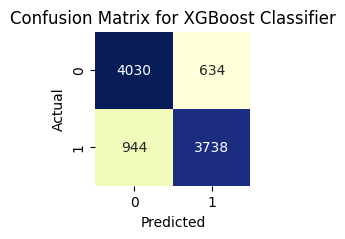

In [ ]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test, dt_pred, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], model_name = "XGBoost Classifier")

In [ ]:
#Division of clients and creation of client model on either XGB or RF classifier

In [ ]:
# Specify the file path of the CSV file
csv_file_path = "/content/drive/MyDrive/UCI_Credit_Card.csv (1).zip"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Shuffle the data randomly
shuffled_df = df.sample(frac=1, random_state=42)

# Divide into three clients
client_size = 10000
client1 = shuffled_df.iloc[:client_size]
client2 = shuffled_df.iloc[client_size:2 * client_size]
client3 = shuffled_df.iloc[2 * client_size:3 * client_size]

# Verify the division
print("Client 1:")
print(client1.head())
print("\nClient 2:")
print(client2.head())
print("\nClient 3:")
print(client3.head())

Client 1:
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2308    2309    30000.0    1          2         2   25      0      0      0   
22404  22405   150000.0    2          1         2   26      0      0      0   
23397  23398    70000.0    2          3         1   32      0      0      0   
25058  25059   130000.0    1          3         2   49      0      0      0   
2664    2665    50000.0    2          2         2   36      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2308       0  ...    12580.0    13716.0    14828.0    1500.0    2000.0   
22404      0  ...   101581.0    77741.0    77264.0    4486.0    4235.0   
23397      0  ...    69753.0    70111.0    70212.0    2431.0    3112.0   
25058      0  ...    16898.0    11236.0     6944.0    1610.0    1808.0   
2664       0  ...    19574.0    20295.0    19439.0    2000.0    1500.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.mo

In [ ]:
#Renaming the column convention to avoid any confusion
client1.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

client1.rename(columns = {'default.payment.next.month':'default_pay'}, inplace=True)

# since we know that our data is imbalanced, let's apply SMOTE to balance the dataset and see if it improves our accuracy.
X1 = client1.drop('default_pay', axis=1)
y1 = client1['default_pay']

smote = SMOTE()
x_smote1, y_smote1 = smote.fit_resample(X1,y1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_smote1, y_smote1, test_size=0.2, random_state=42)

# Initializing the models
#logreg = LogisticRegression()
#dt = DecisionTreeClassifier()
#rf = RandomForestClassifier()
#xgb_classifier = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train1, y_train1)
dt.fit(X_train1, y_train1)
rf.fit(X_train1, y_train1)
xgb_classifier.fit(X_train1, y_train1)


# Making predictions
logreg_pred1 = logreg.predict(X_test1)
dt_pred1 = dt.predict(X_test1)
rf_pred1 = rf.predict(X_test1)
xgb_pred1 = xgb_classifier.predict(X_test1)

# Calculating accuracy
logreg_accuracy1 = accuracy_score(y_test1, logreg_pred1)
dt_accuracy1 = accuracy_score(y_test1, dt_pred1)
rf_accuracy1 = accuracy_score(y_test1, rf_pred1)
xgb_accuracy1 = accuracy_score(y_test1, xgb_pred1)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy1)
print("Decision Tree Accuracy:", dt_accuracy1)
print("Random Forest Accuracy:", rf_accuracy1)
print("XGBoost Accuracy:", xgb_accuracy1)

<ipython-input-30-5be43335093b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client1.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
<ipython-input-30-5be43335093b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client1.rename(columns = {'default.payment.next.month':'default_pay'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

Logistic Regression Accuracy: 0.6086956521739131
Decision Tree Accuracy: 0.7522378516624041
Random Forest Accuracy: 0.8497442455242967
XGBoost Accuracy: 0.829923273657289


In [ ]:
# Extract the weights (coefficients) and the intercept from the logistic regression model
weights1 = logreg.coef_[0]
intercept1 = logreg.intercept_

# Print the weights and intercept
print("Weights:", weights1)
print("Intercept:", intercept1)

Weights: [ 1.59359369e-05 -1.21626938e-06 -4.75345963e-08 -2.09330228e-08
 -4.73388467e-08  2.33457924e-06  3.78501417e-07  2.89923695e-07
  2.57395093e-07  2.45570126e-07  2.29043211e-07  2.11110064e-07
 -9.17169360e-06  9.33378611e-06  1.03665379e-06 -4.10150616e-06
  6.26536596e-06  3.13284065e-06 -4.16863668e-05 -1.89717670e-05
 -6.99993735e-06 -1.66765061e-05 -9.22056308e-06 -3.05749012e-06]
Intercept: [6.13819371e-08]


In [ ]:
#NN

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import pandas as pd

data = pd.read_csv(csv_file_path)

# Split the data into three equal parts
split_size = 10000
data_1 = data[:split_size]
data_2 = data[split_size:2*split_size]
data_3 = data[2*split_size:3*split_size]

# Process data_1
predictors_1 = data_1.drop(['ID', 'default.payment.next.month'], axis=1).values
predictors_1 = StandardScaler().fit_transform(predictors_1)
target_1 = to_categorical(data_1['default.payment.next.month'])

# Process data_2
predictors_2 = data_2.drop(['ID', 'default.payment.next.month'], axis=1).values
predictors_2 = StandardScaler().fit_transform(predictors_2)
target_2 = to_categorical(data_2['default.payment.next.month'])

# Process data_3
predictors_3 = data_3.drop(['ID', 'default.payment.next.month'], axis=1).values
predictors_3 = StandardScaler().fit_transform(predictors_3)
target_3 = to_categorical(data_3['default.payment.next.month'])


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [ ]:
# Calculating default Ratio
non_default = len(data[data['default.payment.next.month']==0])
default = len(data[data['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.2212


In [ ]:
n_cols = predictors_1.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(predictors_1, target_1, epochs=20, validation_split=0.3, callbacks = [early_stopping_monitor],class_weight=class_weight)

weights = model.get_weights()

# Extract the weights for each layer
dense1_weights_1 = weights[0]
dense2_weights_1 = weights[2]
dense3_weights_1 = weights[4]
output_weights_1 = weights[6]

# Print the shape of each weight array
print("Shape of dense1 weights:", dense1_weights_1.shape)
print("Shape of dense2 weights:", dense2_weights_1.shape)
print("Shape of dense3 weights:", dense3_weights_1.shape)
print("Shape of output weights:", output_weights_1.shape)

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.2243 - accuracy: 0.6409 - val_loss: 0.6268 - val_accuracy: 0.7400
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2130 - accuracy: 0.7234 - val_loss: 0.6032 - val_accuracy: 0.7403
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.7343 - val_loss: 0.5802 - val_accuracy: 0.7563
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.7369 - val_loss: 0.5694 - val_accuracy: 0.7620
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2036 - accuracy: 0.7386 - val_loss: 0.5741 - val_accuracy: 0.7620
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2027 - accuracy: 0.7460 - val_loss: 0.5876 - val_accuracy: 0.7487
Shape of dense1 weights: (23, 25)
Shape of dense2 weights: (25, 25)
Shape of dense3 weights: (25, 20)
Shape of output weights: (20, 2)


In [ ]:
n_cols = predictors_2.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0: ratio, 1: 1 - ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(n_cols,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors_2, target_2, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor], class_weight=class_weight)

weights = model.get_weights()

# Extract the weights for each layer
dense1_weights_2 = weights[0]
dense2_weights_2 = weights[2]
dense3_weights_2 = weights[4]
output_weights_2 = weights[6]

# Print the shape of each weight array
print("Shape of dense1 weights:", dense1_weights_2.shape)
print("Shape of dense2 weights:", dense2_weights_2.shape)
print("Shape of dense3 weights:", dense3_weights_2.shape)
print("Shape of output weights:", output_weights_2.shape)


Epoch 1/20
219/219 [==============================] - 3s 6ms/step - loss: 0.2233 - accuracy: 0.6224 - val_loss: 0.5907 - val_accuracy: 0.7740
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2101 - accuracy: 0.7400 - val_loss: 0.5854 - val_accuracy: 0.7803
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.7494 - val_loss: 0.5501 - val_accuracy: 0.7897
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2039 - accuracy: 0.7519 - val_loss: 0.5413 - val_accuracy: 0.7953
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2017 - accuracy: 0.7540 - val_loss: 0.5990 - val_accuracy: 0.7467
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2007 - accuracy: 0.7436 - val_loss: 0.5563 - val_accuracy: 0.7780
Shape of dense1 weights: (23, 25)
Shape of dense2 weights: (25, 25)
Shape of dense3 weights: (25, 20)
Shape of output weights: (20, 2)


In [ ]:
n_cols = predictors_3.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0: ratio, 1: 1 - ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(n_cols,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors_3, target_3, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor], class_weight=class_weight)

weights = model.get_weights()

# Extract the weights for each layer
dense1_weights_3 = weights[0]
dense2_weights_3 = weights[2]
dense3_weights_3 = weights[4]
output_weights_3 = weights[6]

# Print the shape of each weight array
print("Shape of dense1 weights:", dense1_weights_3.shape)
print("Shape of dense2 weights:", dense2_weights_3.shape)
print("Shape of dense3 weights:", dense3_weights_3.shape)
print("Shape of output weights:", output_weights_3.shape)


Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.2035 - accuracy: 0.6941 - val_loss: 0.5734 - val_accuracy: 0.7830
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1915 - accuracy: 0.7924 - val_loss: 0.5868 - val_accuracy: 0.7547
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1880 - accuracy: 0.7880 - val_loss: 0.5377 - val_accuracy: 0.7783
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.7921 - val_loss: 0.5368 - val_accuracy: 0.7837
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1832 - accuracy: 0.7909 - val_loss: 0.5348 - val_accuracy: 0.7753
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1813 - accuracy: 0.7884 - val_loss: 0.5407 - val_accuracy: 0.7627
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1805 - accuracy: 0.7870 - val_loss: 0.5498 - val_accuracy: 0.7497
Shape 

In [ ]:
dense1_weights_1

array([[-0.10115495, -0.04754839, -0.26806495,  0.25591704,  0.26106393,
        -0.08654504, -0.1789273 ,  0.20331067,  0.08378664, -0.12037626,
         0.07902358, -0.04212257, -0.29195136,  0.30764398,  0.28747675,
         0.19406311,  0.00074311, -0.16362417,  0.08401904,  0.18408489,
        -0.12250193, -0.10509892, -0.08199417,  0.15910174,  0.137673  ],
       [ 0.08555757,  0.23571092,  0.17003538,  0.38780993,  0.21422185,
        -0.32964784,  0.21179537,  0.2185972 ,  0.13529044,  0.17419262,
        -0.4156443 ,  0.05497662,  0.24579835,  0.27566063,  0.14485887,
        -0.2277659 , -0.20181876,  0.21513131,  0.06036309,  0.00310436,
         0.04483195,  0.41422382, -0.27836385,  0.1510559 ,  0.16691919],
       [-0.32898703,  0.33395436, -0.11820472, -0.05755365,  0.04908133,
        -0.09214921,  0.06374885, -0.17580989, -0.02446844, -0.12181734,
        -0.31213877,  0.3229633 , -0.0224154 , -0.24516985,  0.2900432 ,
        -0.00498998,  0.20809047,  0.01162765, -0

In [ ]:
import numpy as np

# Function to pad the weight arrays
def pad_weights(weights_list):
    max_shape = weights_list[0].shape
    for weights in weights_list[1:]:
        max_shape = tuple(max(max_dim, weights.shape[i]) for i, max_dim in enumerate(max_shape))
    padded_weights_list = []
    for weights in weights_list:
        pad_width = [(0, max_dim - weights.shape[i]) for i, max_dim in enumerate(max_shape)]
        padded_weights = np.pad(weights, pad_width, mode='constant')
        padded_weights_list.append(padded_weights)
    return padded_weights_list

dense1 = [np.array(dense1_weights_1), np.array(dense1_weights_2), np.array(dense1_weights_3)]
dense2 = [np.array(dense2_weights_1), np.array(dense2_weights_2), np.array(dense2_weights_3)]
dense3 = [np.array(dense3_weights_1), np.array(dense3_weights_2), np.array(dense3_weights_3)]
output = [np.array(output_weights_1), np.array(output_weights_2), np.array(output_weights_3)]

pad_weights(dense1)
pad_weights(dense2)
pad_weights(dense3)
pad_weights(output)

def federated_averaging(weights_list):
    # Initialize an empty list to store the averaged weights
    averaged_weights = []

    # Reshape the weight arrays to match the expected shapes
    reshaped_weights = [weights.reshape((-1, weights.shape[-1])) for weights in weights_list]

    # Calculate the average of each weight array across all models
    for weights in zip(*reshaped_weights):
        averaged_weights.append(np.mean(weights, axis=0))

    return averaged_weights

def fa(l1, l2, l3):

  a_w = []

  a_w = (l1+l2+l3)/3

  return a_w



averaged_dense1_weights = fa(dense1_weights_1,dense1_weights_2,dense1_weights_3)
averaged_dense2_weights = fa(dense2_weights_1,dense2_weights_2,dense2_weights_3)
averaged_dense3_weights = fa(dense3_weights_1,dense3_weights_2,dense3_weights_3)
averaged_output_weights = fa(output_weights_1,output_weights_2,output_weights_3)


In [ ]:
averaged_dense1_weights

array([[-1.02619790e-01, -4.92236465e-02,  8.77678394e-05,
        -8.13005567e-02, -2.58888215e-01, -9.48690996e-02,
        -3.65242362e-03, -7.78654441e-02,  1.54770121e-01,
        -1.89395845e-01,  1.13038562e-01,  1.59498766e-01,
        -1.23884618e-01, -1.26726702e-01,  1.28720105e-02,
         2.98092961e-02,  2.21598104e-01,  2.25112841e-01,
         1.67618215e-01, -1.89626411e-01,  4.06072699e-02,
         6.81332732e-03,  6.69398392e-03, -1.35971084e-01,
         1.20867699e-01],
       [ 1.73054397e-01, -4.14451696e-02, -4.39071842e-02,
         2.28017762e-01,  1.06838740e-01, -1.80831671e-01,
        -1.77450359e-01, -2.94654146e-02, -2.84153428e-02,
        -1.16948085e-02, -8.12507346e-02,  2.28164554e-01,
         8.44326988e-02,  2.17659310e-01, -2.03920156e-02,
         1.18560372e-02,  5.67624457e-02,  2.26800814e-01,
        -5.39040677e-02,  3.43587361e-02, -6.14851601e-02,
        -5.76303899e-02,  5.54682612e-02, -1.08204953e-01,
         1.79895144e-02],
    

In [ ]:
averaged_output_weights

array([[-0.12229443, -0.09299157],
       [ 0.23593175,  0.078827  ],
       [ 0.1263223 , -0.04731391],
       [ 0.3681412 , -0.24869077],
       [-0.11856651, -0.2712339 ],
       [-0.07511732, -0.04320919],
       [ 0.09713929,  0.22054519],
       [-0.22730136,  0.09498062],
       [-0.1887908 , -0.00720524],
       [ 0.3163869 , -0.17527162],
       [ 0.07638481, -0.11599632],
       [-0.15412416, -0.03146788],
       [ 0.203918  ,  0.01605943],
       [-0.10902413, -0.05785263],
       [-0.14427358,  0.3697265 ],
       [-0.248712  ,  0.00935371],
       [ 0.04300457, -0.09780741],
       [ 0.03126033, -0.04891736],
       [ 0.15352543, -0.15579168],
       [-0.06259773,  0.2878358 ]], dtype=float32)

In [ ]:
def convert_array_type(array2):
    array1 = np.array(array2).tolist()
    return np.array(array1)

d1 = convert_array_type(averaged_dense1_weights)
d2 = convert_array_type(averaged_dense2_weights)
d3 = convert_array_type(averaged_dense3_weights)
o = convert_array_type(averaged_output_weights)


In [ ]:
averaged_dense1_weights.shape

(23, 25)

In [ ]:
averaged_dense2_weights.shape

(25, 25)

In [ ]:
averaged_dense3_weights.shape

(25, 20)

In [ ]:
averaged_output_weights.shape

(20, 2)

In [ ]:

dense1_biases = np.random.rand(25)
dense2_biases = np.random.rand(25)
dense3_biases = np.random.rand(20)
output_biases = np.random.rand(2)


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(23,), weights=[averaged_dense1_weights, dense1_biases]),
    tf.keras.layers.Dense(25, activation='relu', weights=[averaged_dense2_weights, dense2_biases]),
    tf.keras.layers.Dense(20, activation='relu', weights=[averaged_dense3_weights, dense3_biases]),
    tf.keras.layers.Dense(2, activation='softmax', weights=[averaged_output_weights, output_biases])
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 25)                600       
                                                                 
 dense_121 (Dense)           (None, 25)                650       
                                                                 
 dense_122 (Dense)           (None, 20)                520       
                                                                 
 dense_123 (Dense)           (None, 2)                 42        
                                                                 
Total params: 1,812
Trainable params: 1,812
Non-trainable params: 0
_________________________________________________________________


In [ ]:

data = pd.read_csv(csv_file_path)

predictors = data.drop(['ID', 'default.payment.next.month'], axis=1).values
predictors = StandardScaler().fit_transform(predictors)
target = to_categorical(data['default.payment.next.month'])


In [ ]:
import numpy as np
import tensorflow as tf

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
model.fit(predictors, target, epochs=15, validation_split = 0.3)


Epoch 1/15
657/657 [==============================] - 6s 6ms/step - loss: 0.4334 - accuracy: 0.8157 - val_loss: 0.4105 - val_accuracy: 0.8321
Epoch 2/15
657/657 [==============================] - 4s 6ms/step - loss: 0.4327 - accuracy: 0.8157 - val_loss: 0.4072 - val_accuracy: 0.8340
Epoch 3/15
657/657 [==============================] - 4s 6ms/step - loss: 0.4322 - accuracy: 0.8156 - val_loss: 0.4093 - val_accuracy: 0.8324
Epoch 4/15
657/657 [==============================] - 2s 3ms/step - loss: 0.4317 - accuracy: 0.8159 - val_loss: 0.4089 - val_accuracy: 0.8316
Epoch 5/15
657/657 [==============================] - 2s 3ms/step - loss: 0.4314 - accuracy: 0.8170 - val_loss: 0.4089 - val_accuracy: 0.8323
Epoch 6/15
657/657 [==============================] - 2s 3ms/step - loss: 0.4312 - accuracy: 0.8157 - val_loss: 0.4084 - val_accuracy: 0.8330
Epoch 7/15
657/657 [==============================] - 3s 4ms/step - loss: 0.4311 - accuracy: 0.8158 - val_loss: 0.4081 - val_accuracy: 0.8331
Epoch 